# Tutorial 5: Mais sobre x-array

Nesse tutorial, vamos comparar a série de nível do mar em Cananéia com medidas de altímetro no Atlântico Sul. Ao longo da análise, vamos aprender alguns "x-array tricks".

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
url = 'http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.anom.2023.nc'

In [34]:
ds = xr.open_dataset(url)

In [35]:
# converte longitude de [0,360] para [-180,180]
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)

In [38]:
# selecionar um snapshot
subset = ds.isel(time=-1)

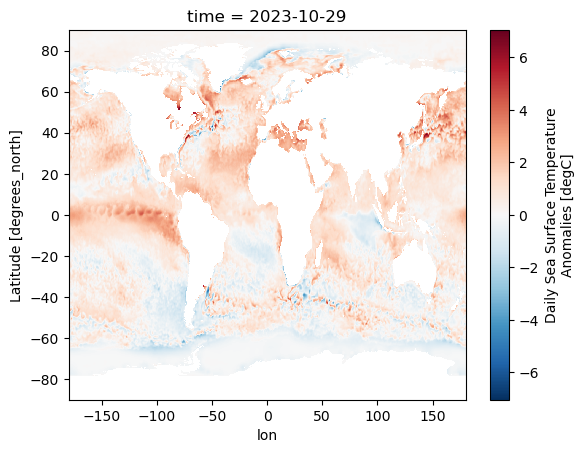

In [39]:
subset.anom.plot()

In [40]:
# # converte longitude de [0,360] para [-180,180]
# subset.coords['lon'] = (subset.coords['lon'] + 180) % 360 - 180
# subset = subset.sortby(subset.lon)

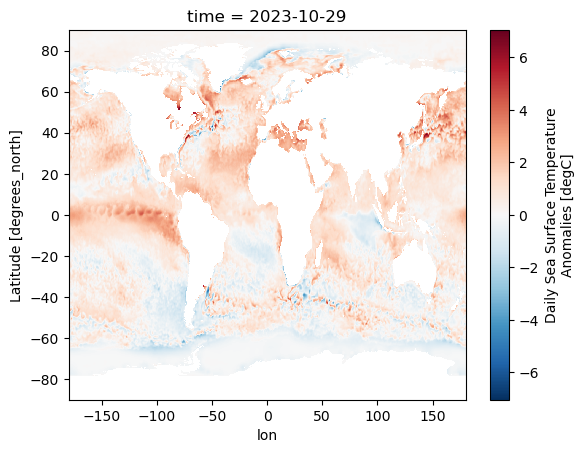

In [41]:
subset.anom.plot()

In [ ]:
# recorta snapshot para Atlântico Sul
subset_AS = subset.where(
                (subset.lon>=-70)&
                (subset.lon<=25)&
                (subset.lat>=-80)&
                (subset.lat<=4),
                drop=True
)

In [23]:
url2 = 'http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/new/sst.oisst.mon.ltm.1991-2020.nc'

In [24]:
ds_mean = xr.open_dataset(url2,decode_times=False).sel(lon=slice(0,180),lat=slice(-80,10))

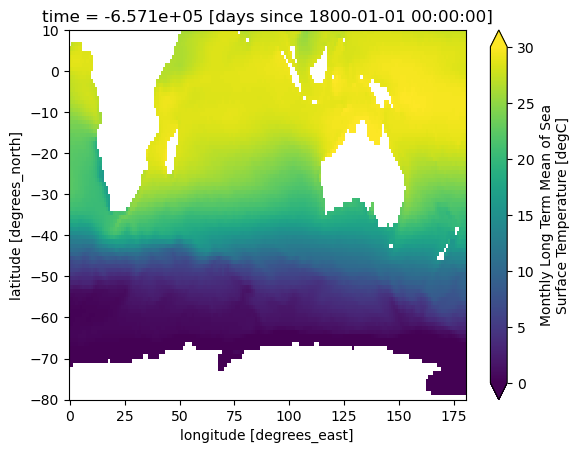

In [25]:
ds_mean.isel(time=0).sst.plot(vmin=0,vmax=30)

In [35]:
ds = xr.open_dataset(url).sel(time=slice('2023-01-01','2023-03-31')).load()

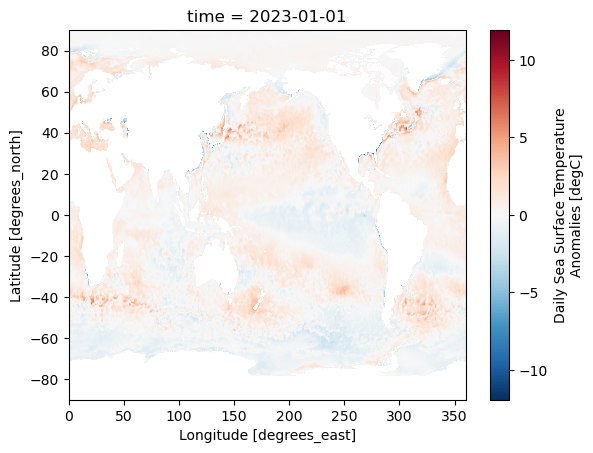

In [37]:
ds.isel(time=0).anom.plot()